In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv


In [2]:
import matplotlib.pyplot as plt
df = pd.read_csv('/kaggle/input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')

# Data Loading

In [3]:
df.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202
4857376,1617148800,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [5]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
df.set_index(df['Timestamp'], inplace=True)
df.drop('Timestamp', axis=1, inplace=True)

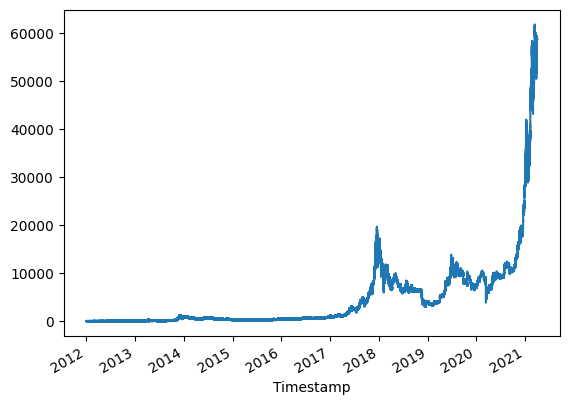

In [6]:
df['Open'].plot();

In [7]:
convertion={
    'Open':'first',
    'High':'max',
    'Low':'min',
    'Close':'mean',
    'Volume_(BTC)':'sum',
    'Volume_(Currency)':'sum'
}

ds_df = df.resample('W').apply(convertion)
ds_df

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency)
Timestamp,,,,,,
2012-01-01,4.39,5.00,4.39,4.621429,116.919878,5.310995e+02
2012-01-08,5.00,7.00,4.93,6.017321,348.298975,1.975273e+03
2012-01-15,6.99,7.38,6.23,6.845145,399.325314,2.770146e+03
2012-01-22,6.20,7.10,5.52,6.332019,731.836776,4.604181e+03
2012-01-29,6.50,6.86,3.80,6.125431,393.194037,2.430909e+03
...,...,...,...,...,...,...
2021-03-07,45261.56,52652.82,45020.25,48915.008325,35430.404648,1.733903e+09
2021-03-14,50952.55,61781.83,49316.98,56071.977534,38099.486052,2.140668e+09
2021-03-21,58956.90,60595.13,53221.00,57410.340495,36350.207453,2.072504e+09


In [8]:
import plotly.graph_objects as go

from datetime import datetime

fig = go.Figure(go.Candlestick(
        x=ds_df.index,
        open=ds_df['Open'],
        high=ds_df['High'],
        low=ds_df['Low'],
        close=ds_df['Close']
    ))

fig.update_layout(
    title='Bitcoin Price',
    yaxis_title='BTC Stock',
    shapes = [dict(
        x0='2015-12-09', x1='2016-12-09', y0=0, y1=0.5, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2016-06-26', y=0.3, xref='x', yref='paper',
        showarrow=True, xanchor='left', text='This is a strange peak!')]
)
fig.update_yaxes(type="log")
fig.show()


In [9]:
col = list(df.columns)

null_val = []
for i in col:
    null_val.append(df[i].isna().value_counts())
pd.DataFrame(null_val)

,False,True
count,3613769,1243608
count,3613769,1243608
count,3613769,1243608
count,3613769,1243608
count,3613769,1243608
count,3613769,1243608
count,3613769,1243608


In [10]:
df.dropna(inplace=True)

<Axes: xlabel='Timestamp'>

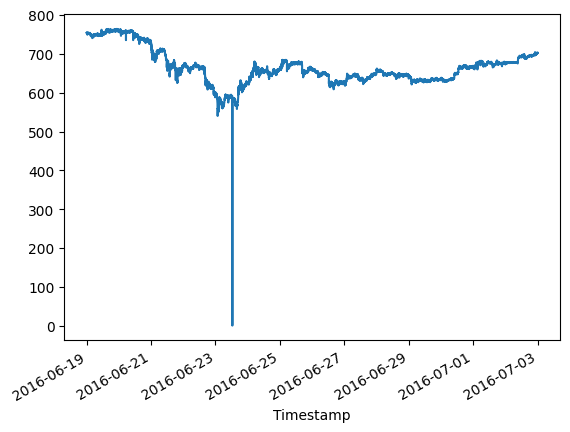

In [11]:
df[(df.index > '2016-06-19') & (df.index < '2016-07-03')]['Low'].plot()

<Axes: xlabel='Timestamp'>

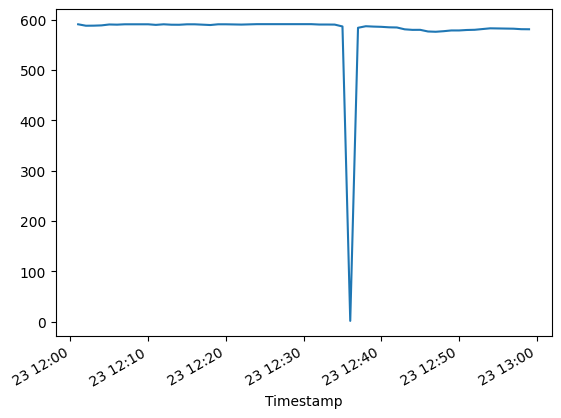

In [12]:
df[(df.index > '2016-06-23 12:00') & (df.index < '2016-06-23 13:00')]['Low'].plot()

In [13]:
df[(df.index > '2016-06-23 12:30') & (df.index < '2016-06-23 12:45')]['Low']

Timestamp
2016-06-23 12:31:00    591.26
2016-06-23 12:32:00    590.54
2016-06-23 12:33:00    590.54
2016-06-23 12:34:00    590.40
2016-06-23 12:35:00    586.71
2016-06-23 12:36:00      1.50
2016-06-23 12:37:00    584.06
2016-06-23 12:38:00    587.15
2016-06-23 12:39:00    586.43
2016-06-23 12:40:00    585.96
2016-06-23 12:41:00    585.00
2016-06-23 12:42:00    584.68
2016-06-23 12:43:00    581.01
2016-06-23 12:44:00    579.93
Name: Low, dtype: float64

In [14]:
df.loc[(df.index == '2016-06-23 12:36:00'), ('Low')] = np.nan
df['Low'].interpolate(method='linear', axis=0, inplace=True)
df[(df.index > '2016-06-23 12:30') & (df.index < '2016-06-23 12:45')]['Low']

Timestamp
2016-06-23 12:31:00    591.260
2016-06-23 12:32:00    590.540
2016-06-23 12:33:00    590.540
2016-06-23 12:34:00    590.400
2016-06-23 12:35:00    586.710
2016-06-23 12:36:00    585.385
2016-06-23 12:37:00    584.060
2016-06-23 12:38:00    587.150
2016-06-23 12:39:00    586.430
2016-06-23 12:40:00    585.960
2016-06-23 12:41:00    585.000
2016-06-23 12:42:00    584.680
2016-06-23 12:43:00    581.010
2016-06-23 12:44:00    579.930
Name: Low, dtype: float64

In [15]:
ds_df = df.resample('W').apply(convertion)
ds_df

fig = go.Figure(go.Candlestick(
        x=ds_df.index,
        open=ds_df['Open'],
        high=ds_df['High'],
        low=ds_df['Low'],
        close=ds_df['Close']
    ))

fig.update_layout(
    title='Bitcoin Price',
    yaxis_title='BTC Stock',
    shapes = [dict(
        x0='2015-12-09', x1='2016-12-09', y0=0, y1=0.5, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2016-06-26', y=0.3, xref='x', yref='paper',
        showarrow=True, xanchor='left', text='There is no more outlier here!')]
)
fig.update_yaxes(type="log")
fig.show()


In [16]:
N=100

ds_df['rolling_mean' + str(N)] = ds_df.Close.rolling(window=5).mean()
ds_df['rolling_ema_'+ str(N)]  = ds_df.Close.ewm(min_periods=N, span=N).mean()

In [17]:

fig = go.Figure()



fig.update_layout(
    title='Bitcoin Price',
    yaxis_title='BTC Stock'
)
fig.update_yaxes(type="log")

fig.add_trace(go.Scatter(x=ds_df.index, y=ds_df['Close'],
                        mode='lines',
                        name='Close'))

fig.add_trace(go.Scatter(x=ds_df.index, y=ds_df['rolling_mean' + str(N)],
                    mode='lines',
                    name='MEAN ' + str(N),
                    line=dict(color='royalblue', width=2)))

fig.add_trace(go.Scatter(x=ds_df.index, y=ds_df['rolling_ema_' + str(N)],
                    mode='lines',
                    name='EMA ' + str(N),
                    line=dict(color='#555555', width=2)))

fig.add_annotation(x='2014-10-15', y=2.8, showarrow=True, startarrowhead=7,text='cross point')

fig.show()